In [149]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
%matplotlib inline

In [150]:
df = pd.read_csv('cars_multivariate.txt')
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite


In [151]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model           398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [153]:
# there are some missing values in horsepower
df.horsepower.value_counts().sort_index().tail()

95.00    14
96.00     3
97.00     9
98.00     2
?         6
Name: horsepower, dtype: int64

In [154]:
# changing horsepower to hp and strings to numbers
df['hp'] = pd.to_numeric(df.horsepower, errors='coerce')
df = df[df.hp.notnull()]

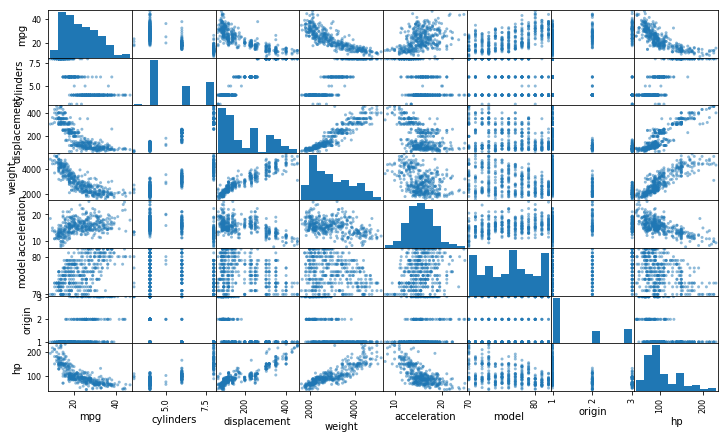

In [155]:
scatter_matrix(df, figsize=(12,7))
None

In [156]:
df.corr()['mpg'].sort_values()

weight         -0.832244
displacement   -0.805127
hp             -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model           0.580541
mpg             1.000000
Name: mpg, dtype: float64

In [157]:
# setting my dependent and independent variables
y = df.mpg
X = df.drop(['mpg', 'origin', 'car_name', 'model', 'horsepower'], axis=1)

# adding a bias/y-intercept
X = sm.add_constant(X)

In [158]:
y.head(1)

0    18.0
Name: mpg, dtype: float64

In [159]:
X.head(1)

,const,cylinders,displacement,weight,acceleration,hp
0,1.0,8,307.0,3504.0,12.0,130.0


In [160]:
# fit with statsmodels
model1 = sm.OLS(y,X)
results = model1.fit()
results.params

const           46.264308
cylinders       -0.397928
displacement    -0.000083
weight          -0.005187
acceleration    -0.029105
hp              -0.045257
dtype: float64

In [161]:
# fit with sklearn
model2 = LinearRegression().fit(X.drop(['const'], axis=1),y)
model2.intercept_, model2.coef_

(46.264307852571143,
 array([ -3.97928359e-01,  -8.31301222e-05,  -5.18691735e-03,
         -2.91047140e-02,  -4.52570802e-02]))

In [162]:
# manually fit
np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

array([  4.62643079e+01,  -3.97928359e-01,  -8.31301222e-05,
        -5.18691735e-03,  -2.91047140e-02,  -4.52570802e-02])

In [163]:
# predict mpg based on features
model2.predict([[8,307.0,3504.0,12.0,130.0]])

array([ 18.64772466])